**Python SQL Assignment**

Step 1

Database schema updated with relational tables!
Departments inserted successfully!
Employees inserted successfully!

Employee Management System
1. Add Employee
2. View Employees
3. Update Employee
4. Delete Employee
5. Add Department
6. Show Employee Count by Department
7. Exit

Number of Employees per Department:
Finance: 1
HR: 1
IT: 1
Marketing: 1


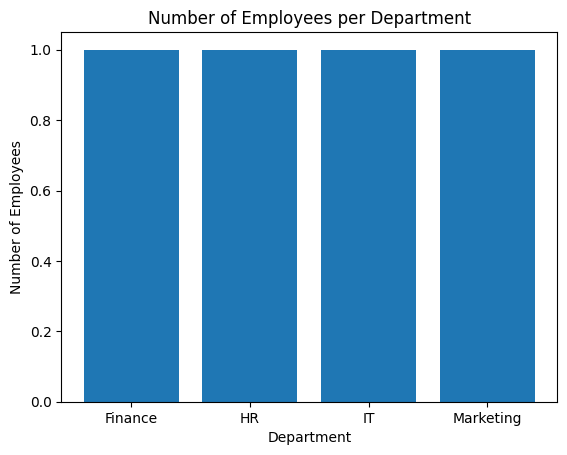



Employee Management System
1. Add Employee
2. View Employees
3. Update Employee
4. Delete Employee
5. Add Department
6. Show Employee Count by Department
7. Exit

Employee List:
(1, 'Alice', 30, 1, 50000.0)
(2, 'Bob', 25, 2, 60000.0)
(3, 'Charlie', 35, 3, 70000.0)
(4, 'David', 28, 4, 55000.0)

Employee Management System
1. Add Employee
2. View Employees
3. Update Employee
4. Delete Employee
5. Add Department
6. Show Employee Count by Department
7. Exit

Exiting... Goodbye!


ProgrammingError: Cannot operate on a closed database.

In [ ]:
import sqlite3
import matplotlib.pyplot as plt
#connect to database
conn = sqlite3.connect("Company.db")
cursor = conn.cursor()
#drop tables to make sure not getting confused by work from assignment
cursor.execute("""DROP TABLE employees""")
cursor.execute("""DROP TABLE departments""")
# Create departments table
cursor.execute("""CREATE TABLE IF NOT EXISTS departments ( id INTEGER PRIMARY KEY AUTOINCREMENT, name TEXT UNIQUE NOT NULL)""")
# Create employees table with a foreign key to departments

cursor.execute ("""CREATE TABLE employees ( id INTEGER PRIMARY KEY AUTOINCREMENT, name TEXT NOT NULL, age INTEGER, department_id INTEGER, salary REAL, FOREIGN KEY (department_id) REFERENCES departments(id) ON DELETE CASCADE)""")
conn.commit()
print("Database schema updated with relational tables!") 

# Insert departments
departments = [("HR",), ("IT",), ("Finance",), ("Marketing",)]
cursor.executemany("INSERT OR IGNORE INTO departments (name) VALUES (?)",
departments)
conn.commit()
print("Departments inserted successfully!")

# Fetch department IDs
cursor.execute("SELECT id, name FROM departments")
departments_dict = {name: dept_id for dept_id, name in cursor.fetchall()} # {'HR': 1, 'IT': 2, ...}
# Insert employees with department IDs
employees = [
 ("Alice", 30, departments_dict["HR"], 50000),
 ("Bob", 25, departments_dict["IT"], 60000),
 ("Charlie", 35, departments_dict["Finance"], 70000),
 ("David", 28, departments_dict["Marketing"], 55000),
]
cursor.executemany("INSERT INTO employees (name, age, department_id, salary) VALUES (?, ?, ?, ?)",
employees)
conn.commit()
print("Employees inserted successfully!") 


#add employees
def add_employee():
    name = input("Enter name: ")
    age = int(input("Enter age: "))
    department = input("Enter department: ")
    salary = float(input("Enter salary: "))
    cursor.execute("INSERT INTO employees (name, age, department, salary) VALUES(?, ?, ?, ?)",(name, age, department, salary))
    conn.commit()
    print(f"\nEmployee {name} added successfully!\n")

def update_employee():
    emp_id = int(input("Enter Employee ID to update: "))
    cursor.execute("SELECT * FROM employees WHERE id = ?", (emp_id,))
    employee = cursor.fetchone()
    if not employee:
        print("\nEmployee not found!\n")
    return
    print("\nUpdating Employee:", employee)
    name = input("Enter new name (or press Enter to keep the same): ") or employee[1]
    age = input("Enter new age (or press Enter to keep the same): ")
    department = input("Enter new department (or press Enter to keep the same): ") or employee[3]
    salary = input("Enter new salary (or press Enter to keep the same): ")
 # Convert inputs if they are not empty
    age = int(age) if age else employee[2]
    salary = float(salary) if salary else employee[4]
    cursor.execute("UPDATE employees SET name = ?, age = ?, department = ?, salary = ? WHERE id =?",(name, age, department, salary, emp_id))
    conn.commit()
    print(f"\nEmployee ID {emp_id} updated successfully!\n")

def delete_employee():
    emp_id = int(input("Enter Employee ID to delete: "))
    cursor.execute("SELECT * FROM employees WHERE id = ?", (emp_id,))
    employee = cursor.fetchone()
    if not employee:
        print("\nEmployee not found!\n")
        return
    confirm = input(f"Are you sure you want to delete {employee[1]}?(yes/no): ").lower()
    if confirm == "yes":
        cursor.execute("DELETE FROM employees WHERE id = ?", (emp_id,))
        conn.commit()
        print(f"\nEmployee ID {emp_id} deleted successfully!\n")
    else:
        print("\nDelete action canceled.\n")


#add new department
def add_department():
    name = input("Enter name: ")
    cursor.execute("INSERT INTO department (name) VALUES(?)",(name))
    conn.commit()
    print(f"\nEmployee {name} added successfully!\n")


#view employees
def view_employees():
    cursor.execute("SELECT * FROM employees")
    employees = cursor.fetchall()
    if not employees:
        print("\nNo employees found.\n")
    else:
        print("\nEmployee List:")
    for emp in employees:
        print(emp)



#employee count by department
def employees_by_dept():
    cursor.execute(""" SELECT departments.name ,COUNT (employees.id) FROM employees JOIN departments ON employees.department_id = departments.id GROUP BY departments.name""")
    dept_counts=cursor.fetchall()

    if not dept_counts:
        print("\nNo department or employees found. \n")

    else:
        print("\nNumber of Employees per Department:")
        for dept, count in dept_counts:
            print(f"{dept}: {count}")
    # Plot number of employees per department
        departments= [dept for dept, count in dept_counts]
        counts = [count for dept, count in dept_counts]
        plt.bar(departments, counts)
        plt.title("Number of Employees per Department")
        plt.xlabel("Department")
        plt.ylabel("Number of Employees")
        plt.show()
    print()


def menu():
    while True:
        print("\nEmployee Management System")
        print("1. Add Employee")
        print("2. View Employees")
        print("3. Update Employee")
        print("4. Delete Employee")
        print("5. Add Department")
        print("6. Show Employee Count by Department")
        print("7. Exit")
        choice = input("Enter your choice: ")
        if choice == "1":
            add_employee()
        elif choice == "2":
            view_employees()
        elif choice == "3":
            update_employee()
        elif choice == "4":
            delete_employee()
        elif choice =="5":
            add_department()
        elif choice == "6" :
            employees_by_dept()
        elif choice == "7":
            print("\nExiting... Goodbye!")
            conn.close()
            break
        else:
            print("\nInvalid choice! Please enter a number between 1 and 5.\n")
# Run the menu
menu()

